# Exercise 3
TIES483

Anette Karhu

## Ex. 3.1:
Implement a steepest descent algorithm, but do a golden section search to each new search direction. This means that you need to define a single-variable function to determine the step length. Set the length of the interval for doing line search as parameter of the method. Solve above problem using your method.

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
# Function given in assignment to be minimized
def func(x):
    return x[0]**2+x[1]**2+x[0]+2*x[1]


In [49]:
# Let's use ex.2 function f and golden search method to calculate the step size
import math 

def f(x):
    return (1-x)**2 + x

def golden_search(a,b,f):
    goldenratio = (math.sqrt(5.0)-1.0)/2.0
    for i in range(0,100000):
        d = goldenratio *(b-a)
        x1 = a+d
        x2 = b-d
        if f(x2) > f(x1):
            a = x2      
        elif f(x2) < f(x1):
            b = x1      
    return a+b/2

length = golden_search(0,2,f)
print('Golden ratio search length result:' ,length)

Golden ratio search length result: 0.7499999960471802


In [50]:
import numpy as np
import ad

# The steepest decent methdod with golden search step size
def gradient_descent_goldsec(f,golden_search_step,accuracy):
    f_start = float('Inf')
    x = np.array([10.0,-10.0])
    f_next = f(x)    
    gs_steps = []
    while abs(f_start-f_next)>accuracy:
        f_start = f_next
        direction = -np.array(ad.gh(f)[0](x))
        x = x+direction*golden_search_step        
        f_next = f(x)
        gs_steps.append(x)
    return x,f_next, gs_steps

In [51]:
golden_search_step = golden_search(10.0,-10.0,f)
print(golden_search_step)

0.750000006098159


In [52]:
(x_value,f_value,gs_steps) = gradient_descent_goldsec(func,golden_search_step,0.000000001)
print("Optimal solution is ",x_value)
print(len(gs_steps))

Optimal solution is  [-0.49998999 -1.00000858]
20


### Ex. 2.2:
Plot the steps of the steepest descent algorithm implemented at the class (with fixed step lengths) against the steps of a steepest descent algorithm that you implemented above. You can choose any starting point you wish, but not the optimum.

In [53]:
# Let's plot the steepest descent algorithm implemented at the class with fixed step size: (taken from the slides)
import numpy as np
import ad
def steepest_descent(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    d = float('Inf')
    while abs(f_old-f_new)>precision:
    #while np.linalg.norm(d)>precision:
        f_old = f_new
        d = -np.array(ad.gh(f)[0](x))
        x = x+d*step
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

In [54]:
start = [10.0,-10.0]
(x_value,f_value,steps) = steepest_descent(func,start,0.2,0.000000001)
print("Optimal solution is ",x_value)
print(len(steps))

Optimal solution is  [-0.49998209 -1.00001535]
26


In [62]:
# Let's plot the steps of the two algorithms with the function from slides slightly modified)
import matplotlib.pyplot as plt

def steps_plot(steps,start):
    vector = np.array([start]+steps).transpose()
    plt.plot(vector[0,],vector[1,],'bh')
    for label,x,y in zip([str(i) for i in range(len(steps)+1)],vector[0,],vector[1,]):
        plt.annotate(label,xy = (x, y))
    return plt

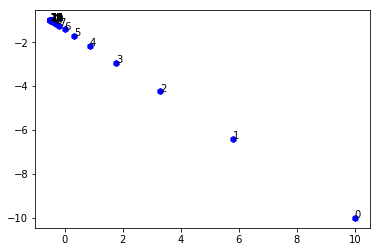

In [63]:
# The steepest descent algorithm implemented at the class, with fixed step
# steps plotted:
steps_plot(steps,start).show()

<module 'matplotlib.pyplot' from 'C:\\Users\\Anette\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

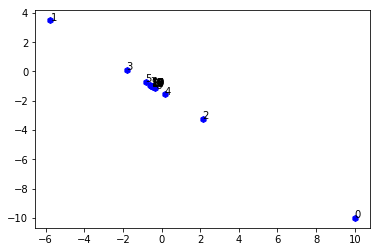

In [64]:
# a steepest descent algorithm with a golden section search
# steps plotted
steps_plot(gs_steps,[10.0,-10.0])